# Exploratory Data Analysis

In [29]:
# IMPORTS

import os
import zipfile
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Unzip and import data

In [15]:
if not os.path.exists('data/full_data.csv'):    # unzip data if not already
    with zipfile.ZipFile('data/full_data.csv.zip', 'r') as zip_ref:
        zip_ref.extractall('data')

df = pd.read_csv('data/full_data.csv')  # read data into dataframe

df

,info_click_valid,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99
0,1,3282490636,3723861767,592628169,2093237750,3617548381,2965721776,3543218850,1072184752,1418147852,...,3637550824,3790689556,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631
1,1,2736633149,3188050045,3599848058,2300041243,3503728323,1531702445,3543218850,2634671414,2266512440,...,3637550824,3790689556,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631
2,1,1067402948,108565582,2502341442,3474641266,3503728323,1531702445,3543218850,4108477053,870407079,...,147472623,3508206064,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631
3,1,3634365896,2567512859,753387811,2124887610,3503728323,2965721776,3543218850,4108477053,3981694603,...,147472623,3508206064,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631
4,1,3282490636,1241498584,99521842,868270843,3503728323,1531702445,3543218850,4108477053,3377404711,...,147472623,2450605253,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572873,0,719059834,108565582,1622567635,265581914,3503728323,2965721776,3543218850,3153333045,1315254508,...,3637550824,3790689556,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,680663615,3956900602
1572874,1,3855058850,3117534041,148578446,1880637442,3617548381,1531702445,3543218850,1072184752,603519084,...,147472623,2450605253,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631
1572875,1,59570122,2236475198,3022312119,2120140848,3503728323,1531702445,3543218850,3371001158,2147952612,...,147472623,2450605253,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631
1572876,1,1439395589,2819363971,12381797,4195009840,3503728323,2965721776,3543218850,2265512916,2246488302,...,147472623,2450605253,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,3656293508,2846559631


## Cardinality of features

* ad is clicked only in about 20% of samples
* 7 features have only one unique value (useless)
* feature50 highest cardinality (cca. 600K unique values in 1.5M samples)
* features 53, 52, 60, 33 also high cardinality (250K - 300K unique values)
*

In [18]:
df_categorical = df.astype('category')  # convert to categorical
df_categorical.describe()

,info_click_valid,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99
count,1572878,1572878,1572878,1572878,1572878,1572878,1572878,1572878,1572878,1572878,...,1572878,1572878,1572878,1572878,1572878,1572878,1572878,1572878,1572878,1572878
unique,2,295,2526,39404,14633,2,2,2,60,2508,...,2,3,1,1,1,1,1,1,2,2
top,0,3282490636,1241498584,104543806,3589864534,3503728323,1531702445,3543218850,4108477053,2266512440,...,3637550824,3790689556,2087688982,3899436442,3255798468,355094504,3479975775,3411024218,680663615,3956900602
freq,1260151,466145,50997,19997,32730,1398630,1167773,1571632,228587,278352,...,1306405,1306405,1572878,1572878,1572878,1572878,1572878,1572878,1260151,1260151


In [19]:
# ratio of clicked ads
df_categorical['info_click_valid'].value_counts() / df_categorical['info_click_valid'].count()

0    0.801175
1    0.198825
Name: info_click_valid, dtype: float64

In [22]:
# features with only one unique value
df_categorical.nunique()[df_categorical.nunique() == 1]

feature70    1
feature92    1
feature93    1
feature94    1
feature95    1
feature96    1
feature97    1
dtype: int64

In [24]:
# binary features
df_categorical.nunique()[df_categorical.nunique() == 2]

info_click_valid    2
feature4            2
feature5            2
feature6            2
feature14           2
feature32           2
feature90           2
feature98           2
feature99           2
dtype: int64

In [25]:
# NaNs
df_categorical.isna().sum()

# no NaNs in the dataset

info_click_valid    0
feature0            0
feature1            0
feature2            0
feature3            0
                   ..
feature95           0
feature96           0
feature97           0
feature98           0
feature99           0
Length: 101, dtype: int64

In [43]:
df_categorical.nunique().sort_values(ascending=False)

feature50    647413
feature53    288986
feature52    261178
feature60    259917
feature33    250802
              ...  
feature93         1
feature94         1
feature95         1
feature96         1
feature97         1
Length: 101, dtype: int64

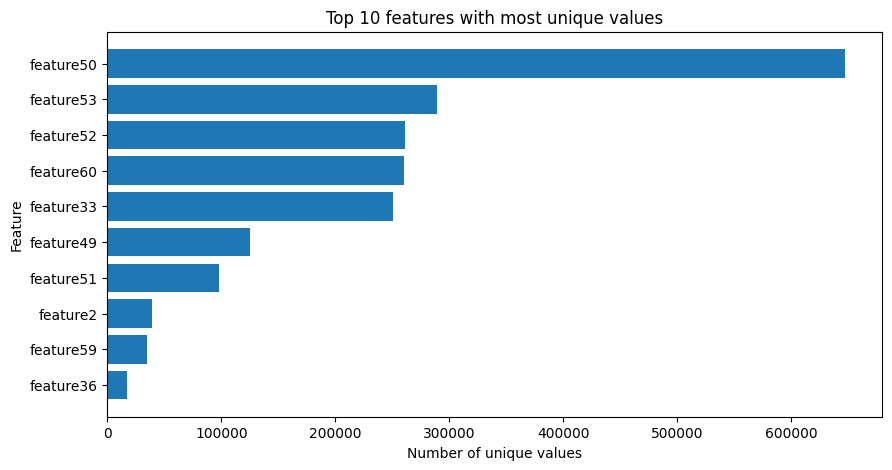

In [46]:
# Features with most unique values (top 10)

plt.figure(figsize=(10, 5))
plt.barh(df_categorical.nunique().sort_values(ascending=False).index[:10],
        df_categorical.nunique().sort_values(ascending=False).values[:10])
# reverse y axis
plt.gca().invert_yaxis()
plt.ylabel('Feature')
plt.xlabel('Number of unique values')
plt.title('Top 10 features with most unique values')
plt.show()
